Checking the recombination rate along the chromosome compared to North/South Ancestry, as calculated in the Baboon diversity paper.

In [1]:
%run ../scripts/notebook_settings_lean.py
from horizonplot import horizonplot

In [2]:
idfile_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/idfile_8_cluster_females.ids"
idfile = pd.read_csv(idfile_path, sep=" ", names=["PGDP_ID", "pop", "inclusion"])
idfile["ID_index"] = idfile.index
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
mapping = {}
for i, row in meta_data_samples.iterrows():
    if row.PGDP_ID[0] != "P":
        mapping["Sci_"+row.PGDP_ID] = row.Origin
    else:
        mapping[row.PGDP_ID] = row.Origin

In [3]:
meta_data_samples.Origin.unique()

array(['Mikumi, Tanzania', 'Aberdare, Kenya', 'Chunga, Zambia', 'captive',
       'Awash, Ethiopia', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Mahale, Tanzania', 'Katavi, Tanzania',
       'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania', 'Niokolo-Koba, Senegal',
       'Issa Valley, Tanzania', 'Dendro Park, Zambia', 'Filoha, Ethiopia',
       'Gog Woreda, Gambella region, Ethiopia'], dtype=object)

In [4]:
df_l = []
baboon_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis"
for population in ['anubis_tanzania']:
    for chrom in ["8", "X"]:
        for ind in idfile.loc[(idfile["pop"] == population) & (idfile.inclusion == 1)].PGDP_ID:
            name = population+"_chr"+chrom+"_8_cluster_"+ind+".txt"
            ind_df = pd.read_csv(baboon_path+"/steps/paint_summary/"+name, sep=" ")
            ind_df["PGDP_ID"] = ind
            ind_df["chrom"] = chrom
            df_l.append(ind_df)
a_8_df = pd.concat(df_l)
a_8_df["north"] = a_8_df.anubis_ethiopia+a_8_df.hamadryas+a_8_df.papio
a_8_df["norm_north"] = (a_8_df.north-a_8_df.iloc[:,1:8].sum(axis=1)/2)
a_8_df["percent_north"] = (a_8_df.north/a_8_df.iloc[:,1:8].sum(axis=1))
a_8_df["pop"] = a_8_df["PGDP_ID"].map(mapping)
a_8_df["start"] = a_8_df["windows"]

In [5]:
input_df = a_8_df
recomb_map_path = "/home/eriks/baboondiversity/data/PG_panu3_recombination_map/ldhat_conversion_chr{}_updated.txt"
window_size = 100000
df_l = []
for chrom in ["8", "X"]:
    windows_length = {}
    input_temp = input_df.loc[input_df.chrom == chrom]
    recomb_map = pd.read_csv(recomb_map_path.format(chrom), sep=" ")
    windows = sorted(input_temp["windows"].unique())
    for window in windows[:-1]:
        windows_length[window] =(recomb_map.loc[recomb_map.position >= window+window_size]["Genetic_Map(cM)"].iloc[0]-
                                 recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    windows_length[windows[-1]] = (recomb_map["Genetic_Map(cM)"].iloc[-2] - 
                            recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    input_temp["cM"] = input_temp["windows"].map(windows_length)
    df_l.append(input_temp)
recomb_df_8_a = pd.concat(df_l)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


[Text(0.5, 1.0, 'Tanzanian Olives')]

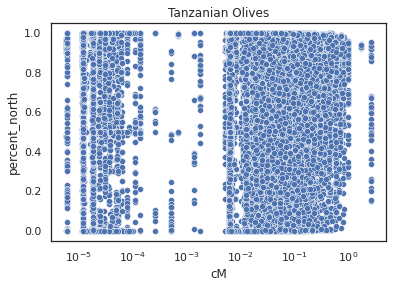

In [6]:
g = sns.scatterplot(data=recomb_df_8_a.loc[recomb_df_8_a.chrom == "X"], x="cM", y="percent_north")
g.set(xscale="log")
g.set(title="Tanzanian Olives")

[None, Text(0.5, 1.0, 'Recombination dist')]

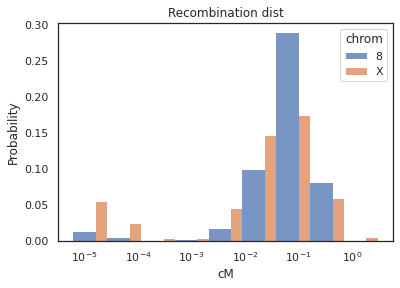

In [7]:
g = sns.histplot(recomb_df_8_a, x="cM", hue="chrom", stat="probability",
            bins=np.logspace(np.log10(recomb_df_8_a["cM"].min()),np.log10(3), 10), multiple="dodge")
g.set(xscale="log", title="Recombination dist")

Constructing the interval index and checking chrX

In [8]:
df = recomb_df_8_a.loc[recomb_df_8_a.chrom == "X"]
bins = 5
tuple_l = []
for b in range(1, bins+1):
    lower = (b-1)/bins
    upper = b/bins
    tuple_l.append((df["cM"].quantile(lower), df["cM"].quantile(upper)))
intervals = pd.IntervalIndex.from_tuples(tuple_l)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


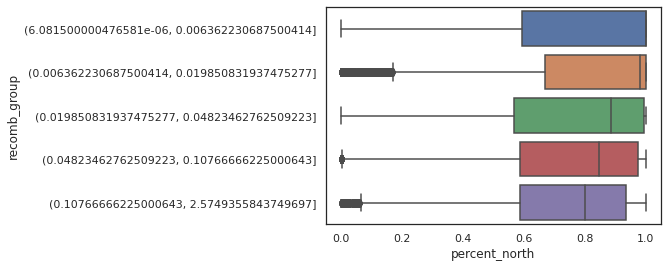

In [9]:
df["recomb_group"] = pd.cut(df["cM"], bins=intervals)
g = sns.boxplot(data=df, x="percent_north", y="recomb_group")

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


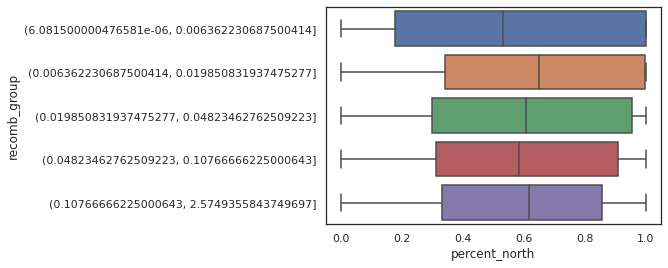

In [10]:
df_t = df.loc[df["pop"] == "Tarangire, Tanzania"]
df_t["recomb_group"] = pd.cut(df_t["cM"], bins=intervals)
g = sns.boxplot(data=df_t, x="percent_north", y="recomb_group")

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


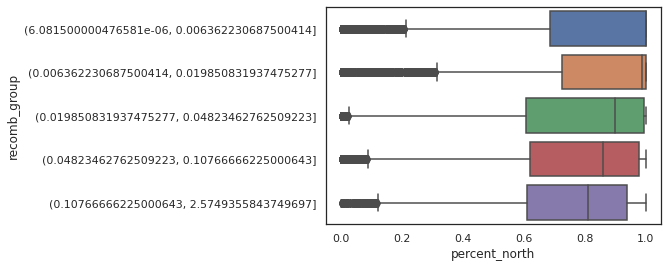

In [11]:
df_o = df.loc[df["pop"] != "Tarangire, Tanzania"]
df_o["recomb_group"] = pd.cut(df_o["cM"], bins=intervals)
g = sns.boxplot(data=df_o, x="percent_north", y="recomb_group")

Checking chr8

In [12]:
df = recomb_df_8_a.loc[recomb_df_8_a.chrom == "8"]
bins = 5
tuple_l = []
for b in range(1, bins+1):
    lower = (b-1)/bins
    upper = b/bins
    tuple_l.append((df["cM"].quantile(lower), df["cM"].quantile(upper)))
intervals = pd.IntervalIndex.from_tuples(tuple_l)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


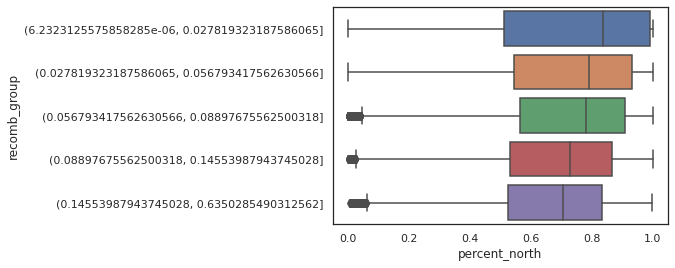

In [13]:
df["recomb_group"] = pd.cut(df["cM"], bins=intervals)
g = sns.boxplot(data=df, x="percent_north", y="recomb_group")

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


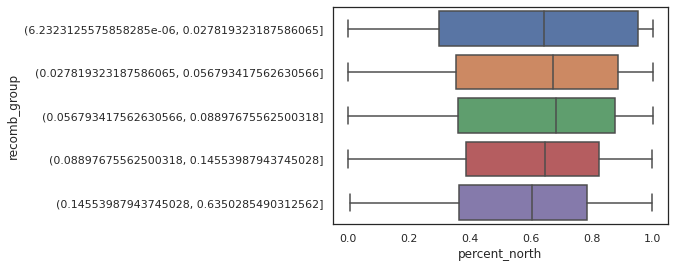

In [14]:
df_t = df.loc[df["pop"] == "Tarangire, Tanzania"]
df_t["recomb_group"] = pd.cut(df_t["cM"], bins=intervals)
g = sns.boxplot(data=df_t, x="percent_north", y="recomb_group")

Checking with the 7 population grouping to remove backcrossing effects

In [15]:
idfile_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/idfile_7_cluster_females.ids"
idfile = pd.read_csv(idfile_path, sep=" ", names=["PGDP_ID", "pop", "inclusion"])
idfile["ID_index"] = idfile.index
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
mapping = {}
for i, row in meta_data_samples.iterrows():
    if row.PGDP_ID[0] != "P":
        mapping["Sci_"+row.PGDP_ID] = row.Origin
    else:
        mapping[row.PGDP_ID] = row.Origin

In [16]:
df_l = []
baboon_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis"
for population in ['cyno_anubis_t']:
    for chrom in ["8", "X"]:
        for ind in idfile.loc[(idfile["pop"] == population) & (idfile.inclusion == 1)].PGDP_ID:
            name = population+"_chr"+chrom+"_7_cluster_"+ind+".txt"
            ind_df = pd.read_csv(baboon_path+"/steps/paint_summary/"+name, sep=" ")
            ind_df["PGDP_ID"] = ind
            ind_df["chrom"] = chrom
            df_l.append(ind_df)
a_7_df = pd.concat(df_l)
a_7_df["north"] = a_7_df.anubis_ethiopia+a_7_df.hamadryas+a_7_df.papio
a_7_df["norm_north"] = (a_7_df.north-a_7_df.iloc[:,1:8].sum(axis=1)/2)
a_7_df["percent_north"] = (a_7_df.north/a_7_df.iloc[:,1:8].sum(axis=1))
a_7_df["pop"] = a_7_df["PGDP_ID"].map(mapping)
a_7_df["start"] = a_7_df["windows"]

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [17]:
input_df = a_7_df
recomb_map_path = "/home/eriks/baboondiversity/data/PG_panu3_recombination_map/ldhat_conversion_chr{}_updated.txt"
window_size = 100000
df_l = []
for chrom in ["8", "X"]:
    windows_length = {}
    input_temp = input_df.loc[input_df.chrom == chrom]
    recomb_map = pd.read_csv(recomb_map_path.format(chrom), sep=" ")
    windows = sorted(input_temp["windows"].unique())
    for window in windows[:-1]:
        windows_length[window] =(recomb_map.loc[recomb_map.position >= window+window_size]["Genetic_Map(cM)"].iloc[0]-
                                 recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    windows_length[windows[-1]] = (recomb_map["Genetic_Map(cM)"].iloc[-2] - 
                            recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    input_temp["cM"] = input_temp["windows"].map(windows_length)
    df_l.append(input_temp)
recomb_df = pd.concat(df_l)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [18]:
df_x = recomb_df.loc[recomb_df.chrom == "X"]
bins = 5
tuple_l = []
for b in range(1, bins+1):
    lower = (b-1)/bins
    upper = b/bins
    tuple_l.append((df_x["cM"].quantile(lower), df_x["cM"].quantile(upper)))
intervals = pd.IntervalIndex.from_tuples(tuple_l)

In [19]:
df_x["pop"].unique()

array(['Mikumi, Tanzania', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania'], dtype=object)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 1.0, 'Mikumi, Tanzania')]

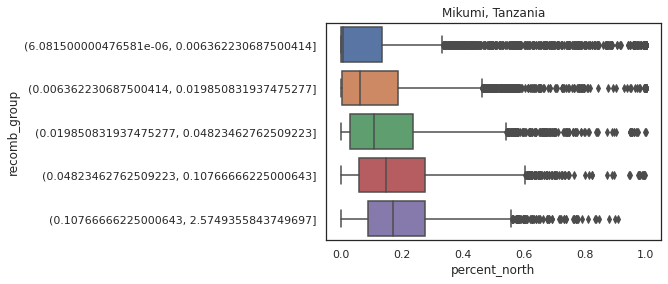

In [20]:
df = df_x.loc[df_x["pop"] == "Mikumi, Tanzania"]
df["recomb_group"] = pd.cut(df["cM"], bins=intervals)
g = sns.boxplot(data=df, x="percent_north", y="recomb_group")
g.set(title = "Mikumi, Tanzania")

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


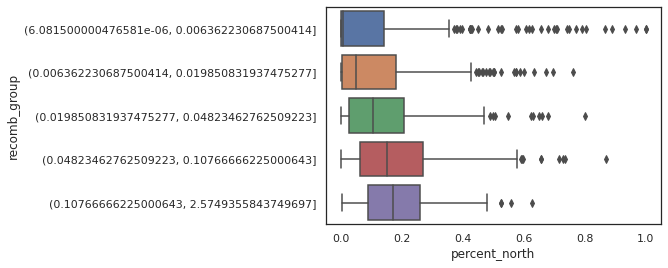

In [21]:
df = df_x.loc[df_x["pop"] == "Selous, Tanzania"]
df["recomb_group"] = pd.cut(df["cM"], bins=intervals)
g = sns.boxplot(data=df, x="percent_north", y="recomb_group")

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


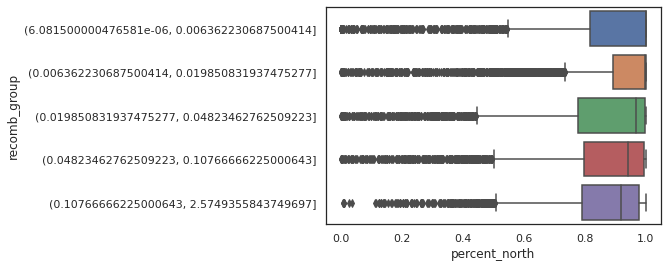

In [22]:
df = df_x.loc[df_x["pop"] == "Lake Manyara, Tanzania"]
df["recomb_group"] = pd.cut(df["cM"], bins=intervals)
g = sns.boxplot(data=df, x="percent_north", y="recomb_group")

In [23]:
df_8 = recomb_df.loc[recomb_df.chrom == "8"]
bins = 10
tuple_l = []
for b in range(1, bins+1):
    lower = (b-1)/bins
    upper = b/bins
    tuple_l.append((df_8["cM"].quantile(lower), df_8["cM"].quantile(upper)))
intervals = pd.IntervalIndex.from_tuples(tuple_l)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


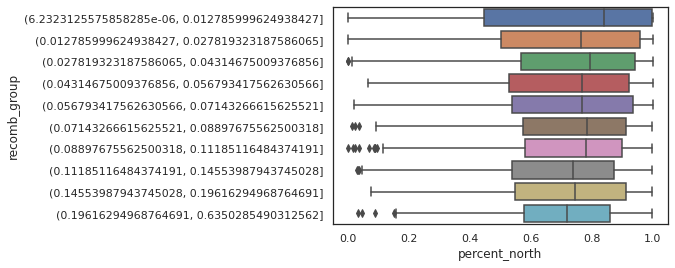

In [24]:
df = df_8.loc[df_8["pop"] == "Tarangire, Tanzania"]
df["recomb_group"] = pd.cut(df["cM"], bins=intervals)
g = sns.boxplot(data=df, x="percent_north", y="recomb_group")

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


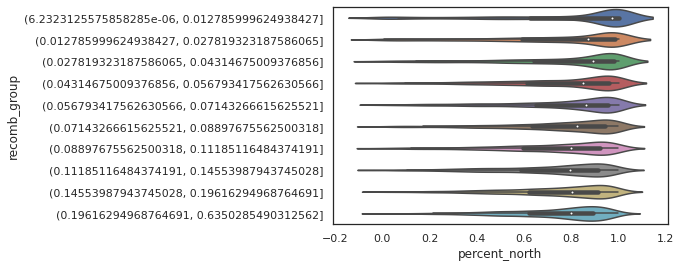

In [25]:
df = df_8.loc[df_8["pop"] == "Gombe, Tanzania"]
df["recomb_group"] = pd.cut(df["cM"], bins=intervals)
g = sns.violinplot(data=df, x="percent_north", y="recomb_group")

In [26]:
df["recomb_group"]

0        (0.08897675562500318, 0.11185116484374191]
1        (0.14553987943745028, 0.19616294968764691]
2         (0.19616294968764691, 0.6350285490312562]
3       (0.056793417562630566, 0.07143266615625521]
4       (0.056793417562630566, 0.07143266615625521]
                           ...                     
1399     (0.07143266615625521, 0.08897675562500318]
1400     (0.11185116484374191, 0.14553987943745028]
1401     (0.07143266615625521, 0.08897675562500318]
1402     (0.07143266615625521, 0.08897675562500318]
1403     (0.14553987943745028, 0.19616294968764691]
Name: recomb_group, Length: 14040, dtype: category
Categories (10, interval[float64, right]): [(6.2323125575858285e-06, 0.012785999624938427] < (0.012785999624938427, 0.027819323187586065] < (0.027819323187586065, 0.04314675009376856] < (0.04314675009376856, 0.056793417562630566] ... (0.08897675562500318, 0.11185116484374191] < (0.11185116484374191, 0.14553987943745028] < (0.14553987943745028, 0.19616294968764691] < (0.19616

Implementing a different plotting method, in which I plot the mean and confidence interval for each bracket.

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


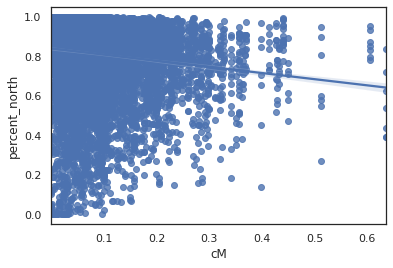

In [27]:
df = df_8.loc[df_8["pop"] == "Serengeti, Tanzania"]
df["recomb_group"] = pd.cut(df["cM"], bins=intervals)
g = sns.regplot(data=df, y="percent_north", x="cM")

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 1.0, 'Mikumi, Tanzania')]

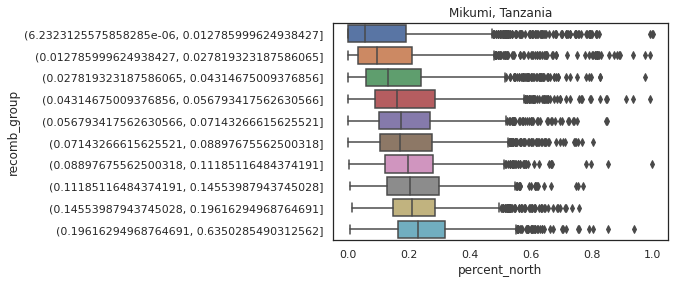

In [28]:
df = df_8.loc[df_8["pop"] == "Mikumi, Tanzania"]
df["recomb_group"] = pd.cut(df["cM"], bins=intervals)
g = sns.boxplot(data=df, x="percent_north", y="recomb_group")
g.set(title = "Mikumi, Tanzania")

In [29]:
df_8.cM.max()

0.6350285490312562

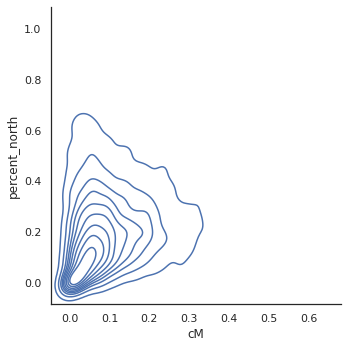

In [30]:
df = df_8.loc[df_8["pop"] == "Mikumi, Tanzania"]
sns.displot(data=df, y="percent_north", x="cM", kind="kde")

Doing it with qcut

First, a little check of the 8 pop setup.

In [96]:
df_temp = recomb_df_8_a.loc[recomb_df_8_a.chrom == "X"]
bins = 10
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False, duplicates="drop")
df_X_8 = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


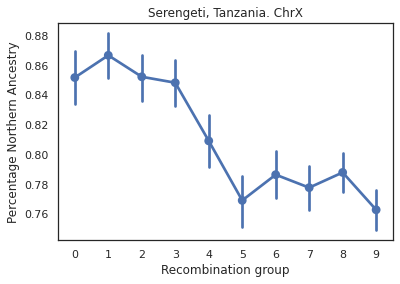

In [98]:
df = df_X_8.loc[df_X_8["pop"] == "Serengeti, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Serengeti, Tanzania. ChrX")
g.set(xlabel="Recombination group", ylabel="Percentage Northern Ancestry")
plt.savefig("../figures/serengeti_chrX_recomb.png", dpi=300, bbox_inches='tight')

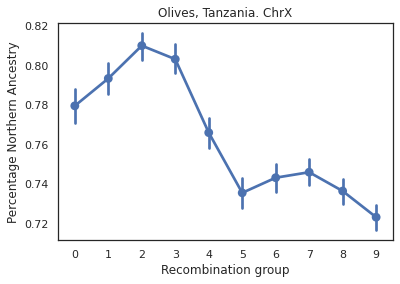

In [99]:
df = df_X_8
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Olives, Tanzania. ChrX")
g.set(xlabel="Recombination group", ylabel="Percentage Northern Ancestry")
plt.savefig("../figures/All_olives_chrX_recomb.png", dpi=300, bbox_inches='tight')

In [31]:
df_temp = recomb_df.loc[recomb_df.chrom == "8"]
bins = 10
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False, duplicates="drop")
df_8 = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0.5, 1.0, 'Serengeti, Tanzania. Chr8')]

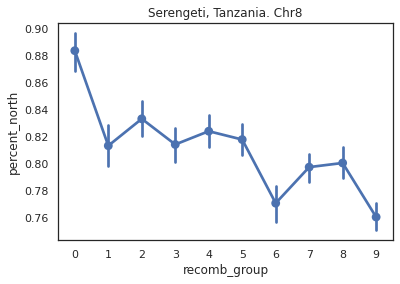

In [32]:
df = df_8.loc[df_8["pop"] == "Serengeti, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Serengeti, Tanzania. Chr8")

[Text(0.5, 1.0, 'Tarangire, Tanzania. Chr8')]

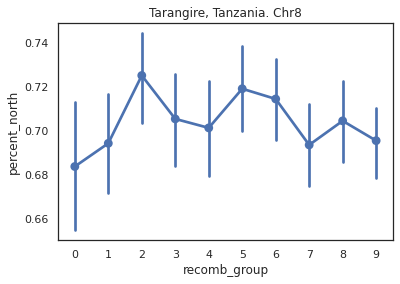

In [33]:
df = df_8.loc[df_8["pop"] == "Tarangire, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Tarangire, Tanzania. Chr8")

[Text(0.5, 1.0, 'Gombe, Tanzania. Chr8')]

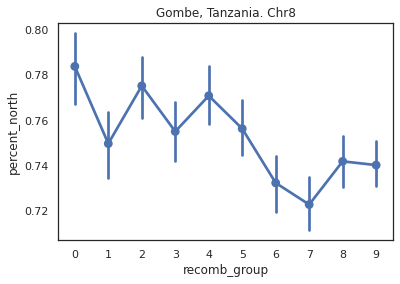

In [34]:
df = df_8.loc[df_8["pop"] == "Gombe, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Gombe, Tanzania. Chr8")

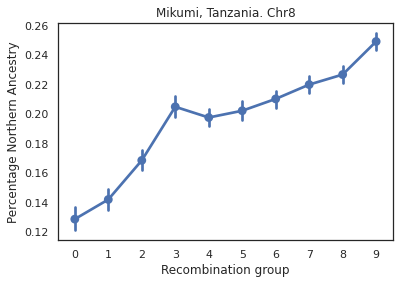

In [94]:
df = df_8.loc[df_8["pop"] == "Mikumi, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Mikumi, Tanzania. Chr8")
g.set(xlabel="Recombination group", ylabel="Percentage Northern Ancestry")
plt.savefig("../figures/mikumi_chr8_recomb.png", dpi=300, bbox_inches='tight')

[Text(0.5, 1.0, 'Ruaha, Tanzania. Chr8')]

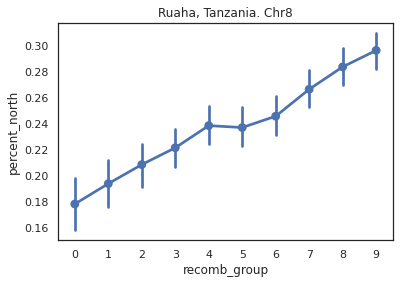

In [36]:
df = df_8.loc[df_8["pop"] == "Ruaha, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Ruaha, Tanzania. Chr8")

In [37]:
df_temp = recomb_df.loc[recomb_df.chrom == "X"]
bins = 10
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False)
df_7_X = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0.5, 1.0, 'Serengeti, Tanzania. ChrX')]

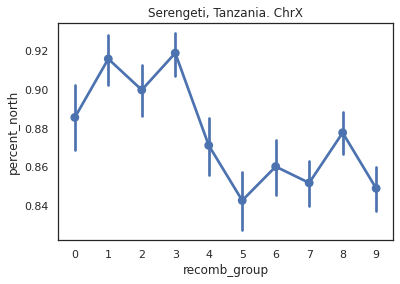

In [38]:
df = df_7_X.loc[df_7_X["pop"] == "Serengeti, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Serengeti, Tanzania. ChrX")

[Text(0.5, 1.0, 'Tarangire, Tanzania. ChrX')]

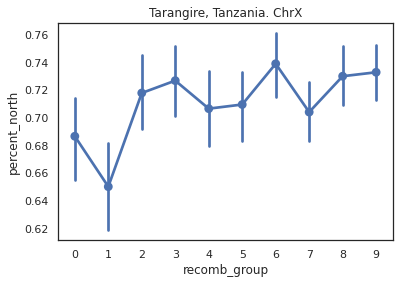

In [39]:
df = df_7_X.loc[df_7_X["pop"] == "Tarangire, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Tarangire, Tanzania. ChrX")

[Text(0.5, 1.0, 'Gombe, Tanzania. ChrX')]

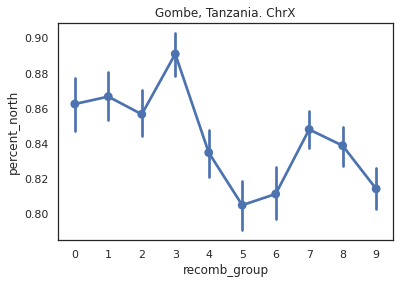

In [40]:
df = df_7_X.loc[df_7_X["pop"] == "Gombe, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Gombe, Tanzania. ChrX")

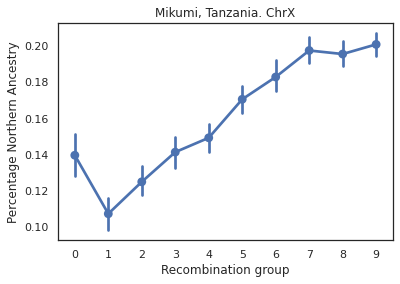

In [93]:
df = df_7_X.loc[df_7_X["pop"] == "Mikumi, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Mikumi, Tanzania. ChrX")
g.set(xlabel="Recombination group", ylabel="Percentage Northern Ancestry")
plt.savefig("../figures/mikumi_chrX_recomb.png", dpi=300, bbox_inches='tight')

[Text(0.5, 1.0, 'Ruaha, Tanzania. ChrX')]

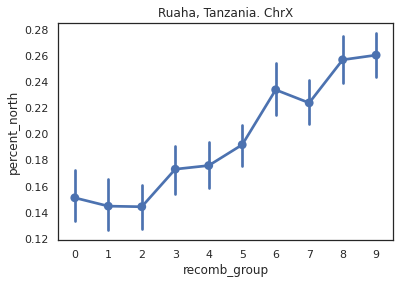

In [42]:
df = df_7_X.loc[df_7_X["pop"] == "Ruaha, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="recomb_group", ci=95)
g.set(title="Ruaha, Tanzania. ChrX")

Checking the hamadryas ancestry in ethiopian anubis

In [43]:
df_l = []
baboon_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis"
for population in ['anubis_ethiopia']:
    for chrom in ["8", "X"]:
        for ind in idfile.loc[(idfile["pop"] == population) & (idfile.inclusion == 1)].PGDP_ID:
            name = population+"_chr"+chrom+"_8_cluster_"+ind+".txt"
            ind_df = pd.read_csv(baboon_path+"/steps/paint_summary/"+name, sep=" ")
            ind_df["PGDP_ID"] = ind
            ind_df["chrom"] = chrom
            df_l.append(ind_df)
a_e_df = pd.concat(df_l)
a_e_df["hamadryas"] = a_e_df.hamadryas
a_e_df["norm_hamadryas"] = (a_e_df.hamadryas-a_e_df.iloc[:,1:8].sum(axis=1)/2)
a_e_df["percent_hamadryas"] = (a_e_df.hamadryas/a_e_df.iloc[:,1:8].sum(axis=1))
a_e_df["pop"] = a_e_df["PGDP_ID"].map(mapping)
a_e_df["start"] = a_e_df["windows"]

In [44]:
input_df = a_e_df
recomb_map_path = "/home/eriks/baboondiversity/data/PG_panu3_recombination_map/ldhat_conversion_chr{}_updated.txt"
window_size = 100000
df_l = []
for chrom in ["8", "X"]:
    windows_length = {}
    input_temp = input_df.loc[input_df.chrom == chrom]
    recomb_map = pd.read_csv(recomb_map_path.format(chrom), sep=" ")
    windows = sorted(input_temp["windows"].unique())
    for window in windows[:-1]:
        windows_length[window] =(recomb_map.loc[recomb_map.position >= window+window_size]["Genetic_Map(cM)"].iloc[0]-
                                 recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    windows_length[windows[-1]] = (recomb_map["Genetic_Map(cM)"].iloc[-2] - 
                            recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    input_temp["cM"] = input_temp["windows"].map(windows_length)
    df_l.append(input_temp)
recomb_df_e = pd.concat(df_l)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [45]:
df_temp = recomb_df_e.loc[recomb_df_e.chrom == "8"]
bins = 10
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False)
df_8_e = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


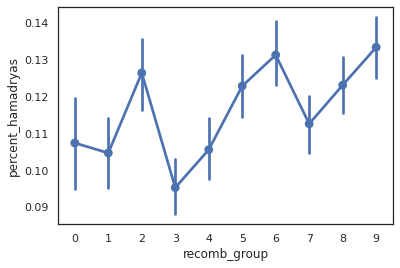

In [46]:
df = df_8_e
g = sns.pointplot(data=df, y="percent_hamadryas", x="recomb_group", ci=95)

In [47]:
df_temp = recomb_df_e.loc[recomb_df_e.chrom == "X"]
bins = 10
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False)
df_X_e = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


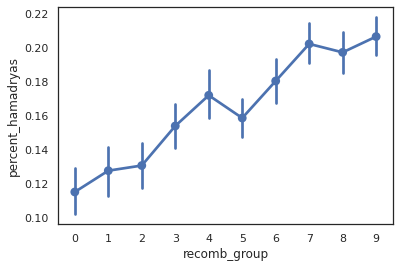

In [48]:
df = df_X_e
g = sns.pointplot(data=df, y="percent_hamadryas", x="recomb_group", ci=95)

In [49]:
df_l = []
baboon_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis"
for population in ['hamadryas']:
    for chrom in ["8", "X"]:
        for ind in idfile.loc[(idfile["pop"] == population) & (idfile.inclusion == 1)].PGDP_ID:
            name = population+"_chr"+chrom+"_8_cluster_"+ind+".txt"
            ind_df = pd.read_csv(baboon_path+"/steps/paint_summary/"+name, sep=" ")
            ind_df["PGDP_ID"] = ind
            ind_df["chrom"] = chrom
            df_l.append(ind_df)
a_h_df = pd.concat(df_l)
a_h_df["anubis"] = a_h_df.anubis_ethiopia
a_h_df["norm_anubis"] = (a_h_df.anubis_ethiopia-a_h_df.iloc[:,1:8].sum(axis=1)/2)
a_h_df["percent_anubis"] = (a_h_df.anubis_ethiopia/a_h_df.iloc[:,1:8].sum(axis=1))
a_h_df["pop"] = a_h_df["PGDP_ID"].map(mapping)
a_h_df["start"] = a_h_df["windows"]

In [50]:
input_df = a_h_df
recomb_map_path = "/home/eriks/baboondiversity/data/PG_panu3_recombination_map/ldhat_conversion_chr{}_updated.txt"
window_size = 100000
df_l = []
for chrom in ["8", "X"]:
    windows_length = {}
    input_temp = input_df.loc[input_df.chrom == chrom]
    recomb_map = pd.read_csv(recomb_map_path.format(chrom), sep=" ")
    windows = sorted(input_temp["windows"].unique())
    for window in windows[:-1]:
        windows_length[window] =(recomb_map.loc[recomb_map.position >= window+window_size]["Genetic_Map(cM)"].iloc[0]-
                                 recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    windows_length[windows[-1]] = (recomb_map["Genetic_Map(cM)"].iloc[-2] - 
                            recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    input_temp["cM"] = input_temp["windows"].map(windows_length)
    df_l.append(input_temp)
recomb_df_h = pd.concat(df_l)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [51]:
df_temp = recomb_df_h.loc[recomb_df_h.chrom == "8"]
bins = 50
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False)
df_8_h = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


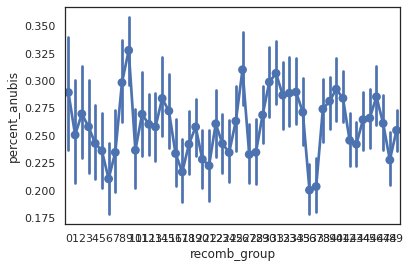

In [52]:
df = df_8_h
g = sns.pointplot(data=df, y="percent_anubis", x="recomb_group", ci=95)

In [53]:
df_temp = recomb_df_h.loc[recomb_df_h.chrom == "X"]
bins = 50
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False)
df_X_h = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


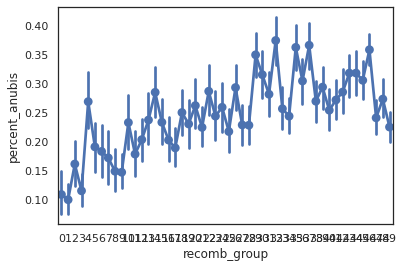

In [54]:
df = df_X_h
g = sns.pointplot(data=df, y="percent_anubis", x="recomb_group", ci=95)

Checking papio ancestry in the various locations

In [55]:
idfile_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/idfile_8_cluster_females.ids"
idfile = pd.read_csv(idfile_path, sep=" ", names=["PGDP_ID", "pop", "inclusion"])
idfile["ID_index"] = idfile.index
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
mapping = {}
for i, row in meta_data_samples.iterrows():
    if row.PGDP_ID[0] != "P":
        mapping["Sci_"+row.PGDP_ID] = row.Origin
    else:
        mapping[row.PGDP_ID] = row.Origin

In [56]:
df_l = []
baboon_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis"
for population in idfile["pop"].unique():
    for chrom in ["8", "X"]:
        for ind in idfile.loc[(idfile["pop"] == population) & (idfile.inclusion == 1)].PGDP_ID:
            name = population+"_chr"+chrom+"_8_cluster_"+ind+".txt"
            ind_df = pd.read_csv(baboon_path+"/steps/paint_summary/"+name, sep=" ")
            ind_df["PGDP_ID"] = ind
            ind_df["chrom"] = chrom
            df_l.append(ind_df)
p_8_df = pd.concat(df_l)
p_8_df["papio"] = p_8_df.papio
p_8_df["norm_papio"] = (p_8_df.papio-p_8_df.iloc[:,1:8].sum(axis=1)/2)
p_8_df["percent_papio"] = (p_8_df.papio/p_8_df.iloc[:,1:8].sum(axis=1))
p_8_df["pop"] = p_8_df["PGDP_ID"].map(mapping)
p_8_df["start"] = p_8_df["windows"]

In [57]:
input_df = p_8_df
recomb_map_path = "/home/eriks/baboondiversity/data/PG_panu3_recombination_map/ldhat_conversion_chr{}_updated.txt"
window_size = 100000
df_l = []
for chrom in ["8", "X"]:
    windows_length = {}
    input_temp = input_df.loc[input_df.chrom == chrom]
    recomb_map = pd.read_csv(recomb_map_path.format(chrom), sep=" ")
    windows = sorted(input_temp["windows"].unique())
    for window in windows[:-1]:
        windows_length[window] =(recomb_map.loc[recomb_map.position >= window+window_size]["Genetic_Map(cM)"].iloc[0]-
                                 recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    windows_length[windows[-1]] = (recomb_map["Genetic_Map(cM)"].iloc[-2] - 
                            recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    input_temp["cM"] = input_temp["windows"].map(windows_length)
    df_l.append(input_temp)
recomb_df_p = pd.concat(df_l)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [58]:
recomb_df_p["pop"].unique()

array(['Mikumi, Tanzania', 'Ruaha, Tanzania', 'Udzungwa, Tanzania',
       'Selous, Tanzania', 'Chunga, Zambia', 'Awash, Ethiopia',
       'Filoha, Ethiopia', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Gombe, Tanzania',
       'Lake Manyara, Tanzania', 'Tarangire, Tanzania',
       'Mahale, Tanzania', 'Issa Valley, Tanzania',
       'Niokolo-Koba, Senegal', 'Dendro Park, Zambia',
       'Gog Woreda, Gambella region, Ethiopia'], dtype=object)

In [59]:
df_temp = recomb_df_p.loc[recomb_df_p.chrom == "8"]
bins = 20
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False)
df_8_p = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


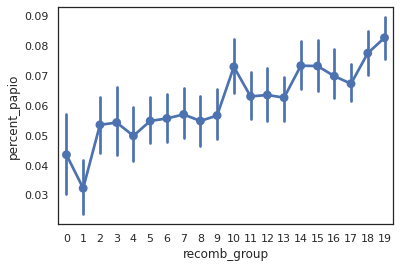

In [60]:
df = df_8_p.loc[df_8_p["pop"] == "Serengeti, Tanzania"]
g = sns.pointplot(data=df, y="percent_papio", x="recomb_group", ci=95)

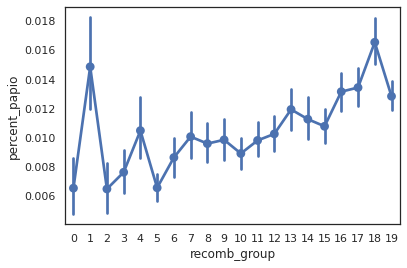

In [61]:
df = df_8_p.loc[df_8_p["pop"] == "Mikumi, Tanzania"]
g = sns.pointplot(data=df, y="percent_papio", x="recomb_group", ci=95)

In [62]:
df_temp = recomb_df_p.loc[recomb_df_p.chrom == "X"]
bins = 10
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False)
df_X_p = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


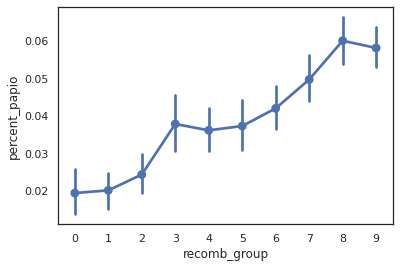

In [63]:
df = df_X_p.loc[df_X_p["pop"] == "Serengeti, Tanzania"]
g = sns.pointplot(data=df, y="percent_papio", x="recomb_group", ci=95)

[Text(0.5, 1.0, 'Mikumi')]

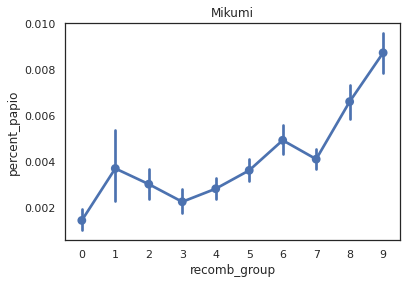

In [64]:
df = df_X_p.loc[df_X_p["pop"] == "Mikumi, Tanzania"]
g = sns.pointplot(data=df, y="percent_papio", x="recomb_group", ci=95)
g.set(title="Mikumi")

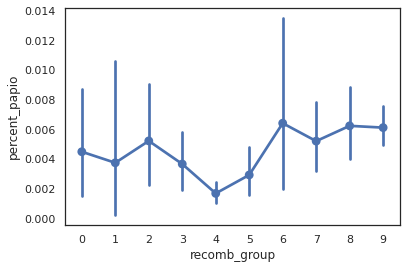

In [65]:
df = df_X_p.loc[df_X_p["pop"] == "Mahale, Tanzania"]
g = sns.pointplot(data=df, y="percent_papio", x="recomb_group", ci=95)

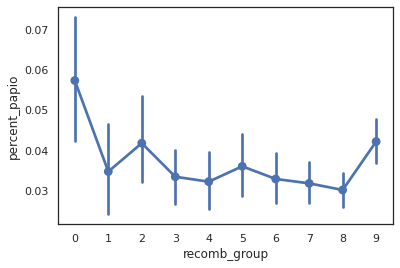

In [66]:
df = df_X_p.loc[df_X_p["pop"] == "Filoha, Ethiopia"]
g = sns.pointplot(data=df, y="percent_papio", x="recomb_group", ci=95)

Also checking with chacma/ursinus ancestry

In [67]:
df_l = []
baboon_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis"
for population in idfile["pop"].unique():
    for chrom in ["8", "X"]:
        for ind in idfile.loc[(idfile["pop"] == population) & (idfile.inclusion == 1)].PGDP_ID:
            name = population+"_chr"+chrom+"_8_cluster_"+ind+".txt"
            ind_df = pd.read_csv(baboon_path+"/steps/paint_summary/"+name, sep=" ")
            ind_df["PGDP_ID"] = ind
            ind_df["chrom"] = chrom
            df_l.append(ind_df)
u_8_df = pd.concat(df_l)
u_8_df["papio"] = u_8_df.ursinus
u_8_df["norm_papio"] = (u_8_df.ursinus-u_8_df.iloc[:,1:8].sum(axis=1)/2)
u_8_df["percent_papio"] = (u_8_df.ursinus/u_8_df.iloc[:,1:8].sum(axis=1))
u_8_df["pop"] = u_8_df["PGDP_ID"].map(mapping)
u_8_df["start"] = u_8_df["windows"]

In [68]:
input_df = u_8_df
recomb_map_path = "/home/eriks/baboondiversity/data/PG_panu3_recombination_map/ldhat_conversion_chr{}_updated.txt"
window_size = 100000
df_l = []
for chrom in ["8", "X"]:
    windows_length = {}
    input_temp = input_df.loc[input_df.chrom == chrom]
    recomb_map = pd.read_csv(recomb_map_path.format(chrom), sep=" ")
    windows = sorted(input_temp["windows"].unique())
    for window in windows[:-1]:
        windows_length[window] =(recomb_map.loc[recomb_map.position >= window+window_size]["Genetic_Map(cM)"].iloc[0]-
                                 recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    windows_length[windows[-1]] = (recomb_map["Genetic_Map(cM)"].iloc[-2] - 
                            recomb_map.loc[recomb_map.position >= window]["Genetic_Map(cM)"].iloc[0])
    input_temp["cM"] = input_temp["windows"].map(windows_length)
    df_l.append(input_temp)
recomb_df_u = pd.concat(df_l)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [69]:
df_temp = recomb_df_u.loc[recomb_df_u.chrom == "8"]
bins = 10
df_temp["recomb_group"] = pd.qcut(df_temp["cM"], bins, labels=False)
df_8_u = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


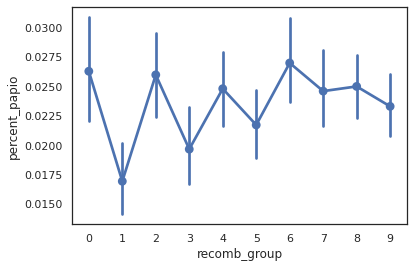

In [70]:
df = df_8_u.loc[df_8_u["pop"] == "Filoha, Ethiopia"]
g = sns.pointplot(data=df, y="percent_papio", x="recomb_group", ci=95)

Checking correlation between ancestry in various baboons in Tanzania.
To check the correlation, I will implement it similar to the Molly Schumer swordtail article, which entails binning based on overall ancestry in 1 population and then investigating the quantiles found in another population.
If you control for recombination rate, this correlation can show that more than ILS/populaiton size effects create this.

I will first try by using Mikumi as pop 1

In [71]:
mikumi_df_8 = recomb_df.loc[(recomb_df["pop"] == "Mikumi, Tanzania") &
                           (recomb_df.chrom == "8")]
serengeti_df_8 = recomb_df.loc[(recomb_df["pop"] == "Serengeti, Tanzania") &
                           (recomb_df.chrom == "8")]

In [72]:
ancestry_mean_df_mikumi = mikumi_df_8.groupby(by="windows").mean()
ancestry_mean_df_serengeti = serengeti_df_8.groupby(by="windows").mean()

In [73]:
ancestry_dict_mikumi = pd.Series(ancestry_mean_df_mikumi.percent_north.values,
                                 ancestry_mean_df_mikumi.index).to_dict()
ancestry_dict_serengeti = pd.Series(ancestry_mean_df_serengeti.percent_north.values,
                                 ancestry_mean_df_serengeti.index).to_dict()

In [74]:
recomb_df["mikumi_ancestry"] = recomb_df["windows"].map(ancestry_dict_mikumi)
recomb_df["serengeti_ancestry"] = recomb_df["windows"].map(ancestry_dict_serengeti)

In [75]:
df_temp = recomb_df.loc[(recomb_df.chrom == "8")]
bins = 100
df_temp["mikumi_group"] = pd.qcut(df_temp["mikumi_ancestry"], bins, labels=False)
subset_df_8 = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
subset_df_8["pop"].unique()

array(['Mikumi, Tanzania', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania'], dtype=object)

[Text(0.5, 1.0, 'Mikumi northern ancestry, ordered. Chr8')]

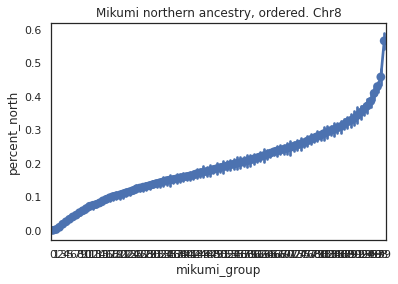

In [77]:
df = subset_df_8.loc[subset_df_8["pop"] == "Mikumi, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="mikumi_group", ci=95)
g.set(title="Mikumi northern ancestry, ordered. Chr8")

[Text(0.5, 1.0, 'Ruaha. Chr8')]

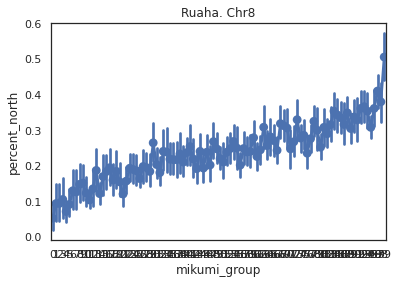

In [78]:
df = subset_df_8.loc[subset_df_8["pop"] == "Ruaha, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="mikumi_group", ci=95)
g.set(title="Ruaha. Chr8")

[Text(0.5, 1.0, 'Tarangire. Chr8')]

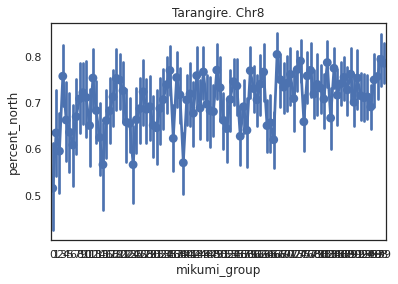

In [79]:
df = subset_df_8.loc[subset_df_8["pop"] == "Tarangire, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="mikumi_group", ci=95)
g.set(title="Tarangire. Chr8")

[Text(0.5, 1.0, 'Gombe. Chr8')]

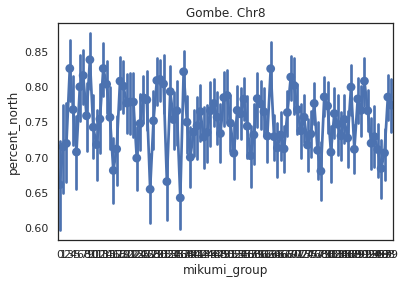

In [80]:
df = subset_df_8.loc[subset_df_8["pop"] == "Gombe, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="mikumi_group", ci=95)
g.set(title="Gombe. Chr8")

[Text(0.5, 1.0, 'Serengeti. Chr8')]

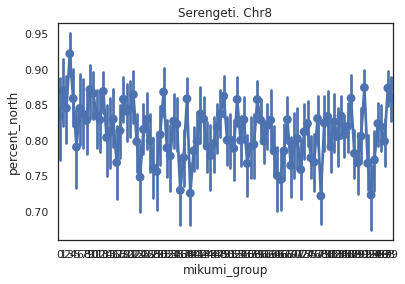

In [81]:
df = subset_df_8.loc[subset_df_8["pop"] == "Serengeti, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="mikumi_group", ci=95)
g.set(title="Serengeti. Chr8")

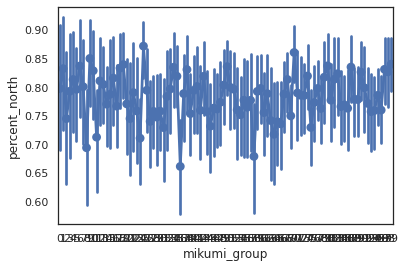

In [82]:
df = subset_df_8.loc[subset_df_8["pop"] == "Arusha, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="mikumi_group", ci=95)

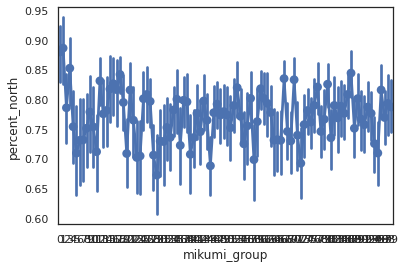

In [83]:
df = subset_df_8.loc[subset_df_8["pop"] == "Ngorongoro, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="mikumi_group", ci=95)

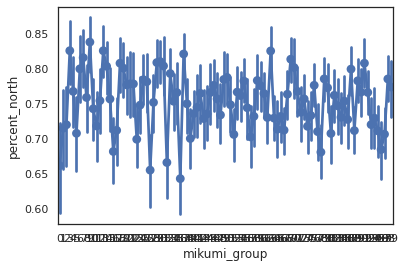

In [84]:
df = subset_df_8.loc[subset_df_8["pop"] == "Gombe, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="mikumi_group", ci=95)

In [85]:
df_temp = recomb_df.loc[(recomb_df.chrom == "8")]
bins = 10
df_temp["serengeti_group"] = pd.qcut(df_temp["serengeti_ancestry"], bins, labels=False)
subset_df_8_serengeti = df_temp

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


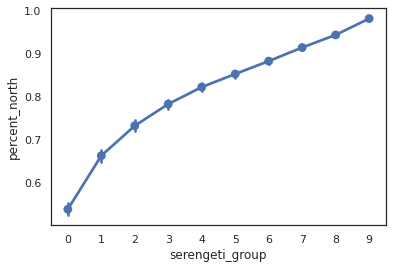

In [86]:
df = subset_df_8_serengeti.loc[subset_df_8_serengeti["pop"] == "Serengeti, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="serengeti_group", ci=95)

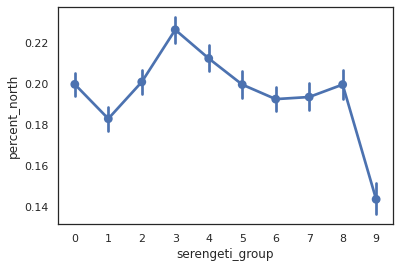

In [87]:
df = subset_df_8_serengeti.loc[subset_df_8_serengeti["pop"] == "Mikumi, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="serengeti_group", ci=95)

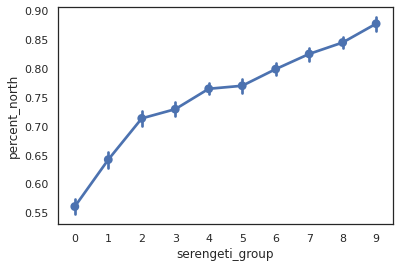

In [88]:
df = subset_df_8_serengeti.loc[subset_df_8_serengeti["pop"] == "Gombe, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="serengeti_group", ci=95)

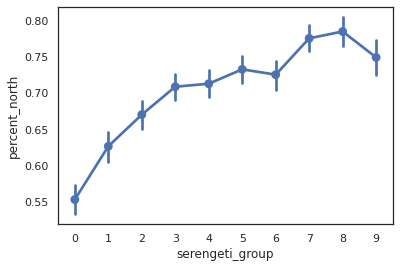

In [89]:
df = subset_df_8_serengeti.loc[subset_df_8_serengeti["pop"] == "Tarangire, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="serengeti_group", ci=95)

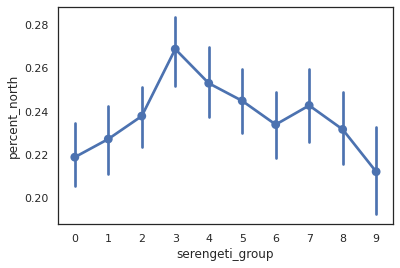

In [90]:
df = subset_df_8_serengeti.loc[subset_df_8_serengeti["pop"] == "Ruaha, Tanzania"]
g = sns.pointplot(data=df, y="percent_north", x="serengeti_group", ci=95)